# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Independent variable - **cnt**

Dependent variable - **The goal is to determine these among the data set**


## Import statements

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Importing pandas and numpy
import pandas as pd
import numpy as np

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing train_test_split
from sklearn.model_selection import train_test_split

#Importing both scalers just in case
from sklearn.preprocessing import MinMaxScaler,StandardScaler
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Import statsmodels.api to add a constant
import statsmodels.api as sm 

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Reading data

In [2]:
bikes = pd.read_csv("day.csv")


In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

In [5]:
#Getting info about columns to check if any null values
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


**No NULL values**

In [6]:
#Checking shape
bikes.shape

(730, 14)

In [7]:
#Get some more insights
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Splitting the data into training and testing data sets

In [8]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [9]:
bikes_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,4,1,10,0,3,1,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534
576,3,1,7,0,3,1,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216
426,1,1,3,0,0,0,2,16.980847,20.6746,62.1250,10.792293,956,3110,4066
728,1,1,12,0,1,1,1,10.489153,11.5850,48.3333,23.500518,364,1432,1796
482,2,1,4,0,0,0,2,15.443347,18.8752,48.9583,8.708325,1120,3100,4220


In [10]:
bikes_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,3,0,7,1,3,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
535,2,1,6,0,4,1,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211
299,4,0,10,0,6,0,2,19.270000,22.85230,81.2917,13.250121,240,2419,2659
221,3,0,8,0,5,1,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780
152,2,0,6,0,6,0,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968


## Visualising the data

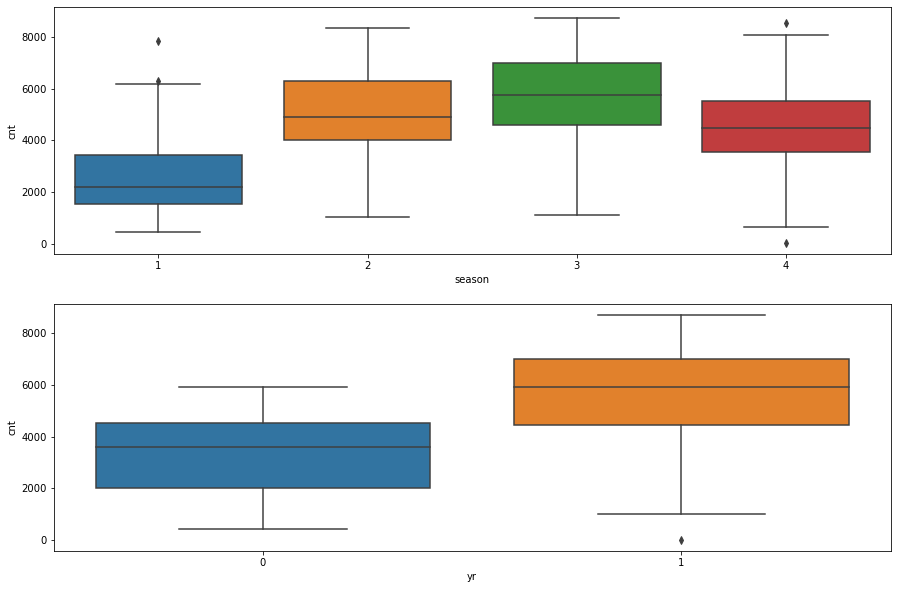

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_train)
plt.subplot(2,1,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_train)
plt.show()

### - Seasons
    - Very few outliers and highest bookings in fall (pleasent weather equals more people booking bikes)
### - Year
    - Higher bookings in 2019 as compared to 2018 saying that demand increased significantly after 1 year of service being introduced

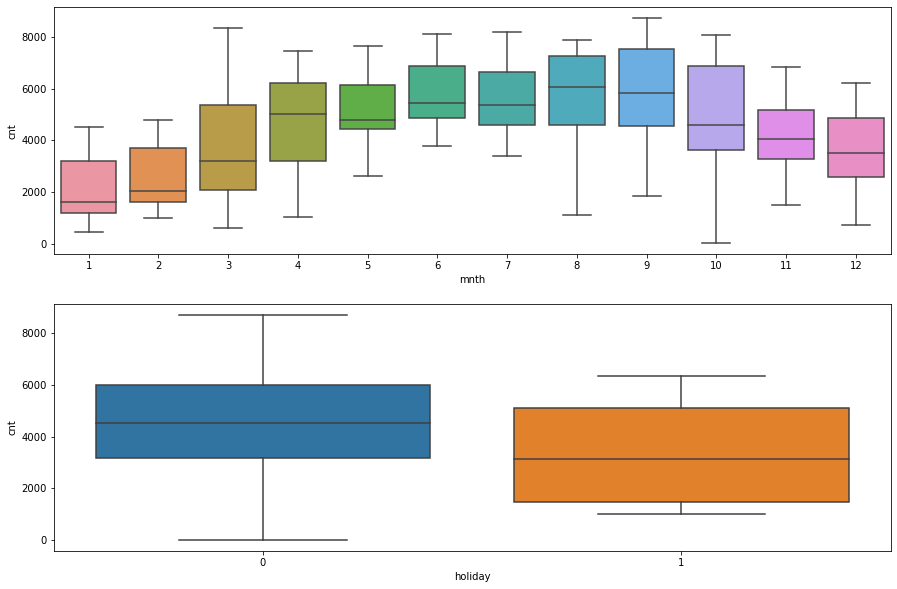

In [12]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_train)
plt.subplot(2,1,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_train)

### - Month
    - Highest bookings between May to September
### - Holiday
    - Higher bookings on non-holidays

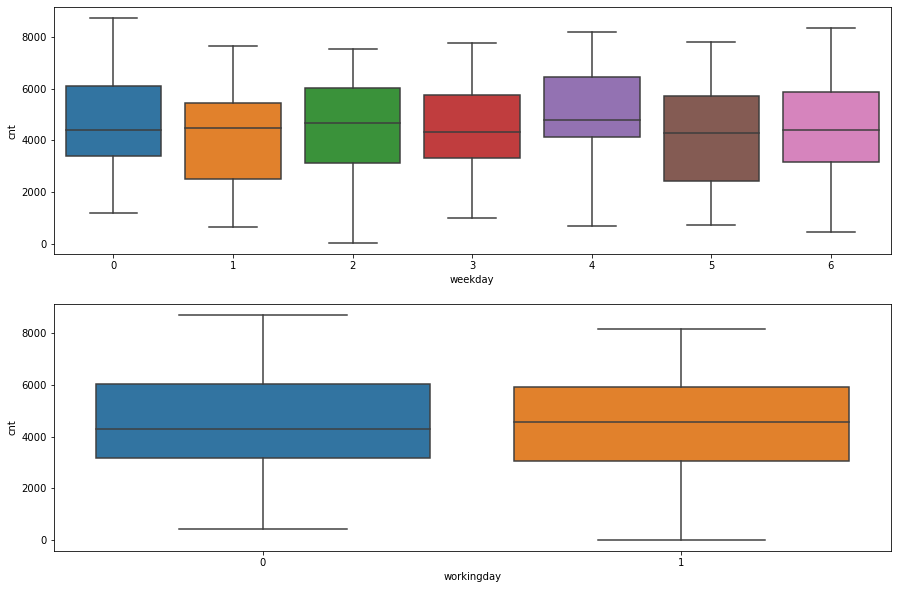

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_train)
plt.subplot(2,1,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_train)

### - Weekday
    - Highest bookings on Thursday (if sunday = 0) or Friday (if monday = 0). Friday seems also right because working people might book bikes on Friday nights
### - Workingday
    - Slightly higher bookings on working days

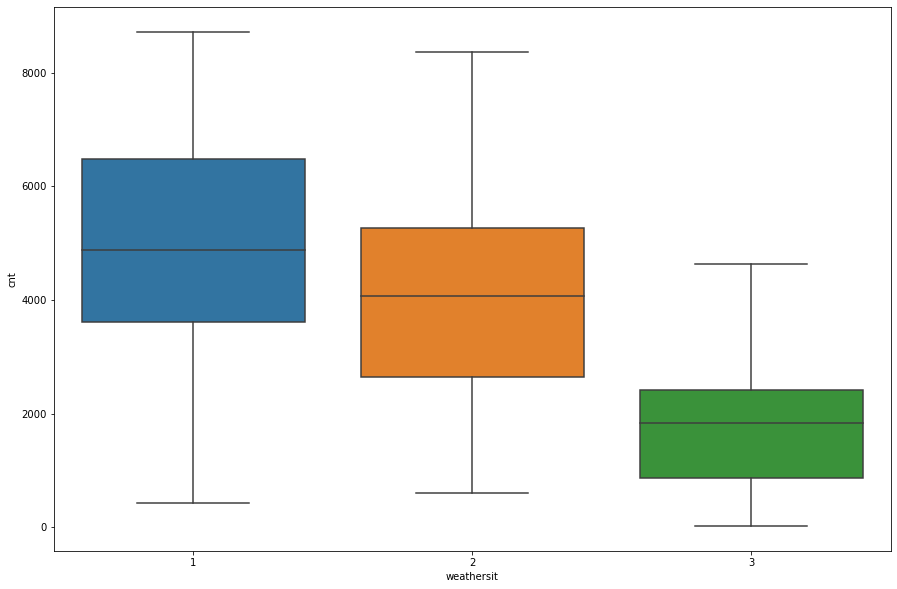

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_train)

### - Weathersit
    - Highest bookings on clear weather and no bookings during heavy rain/snow/thunderstorm

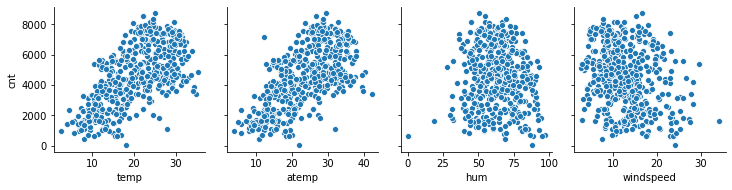

In [15]:
sns.pairplot(x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',data=bikes_train)

### - temp
    - Higher bookings during higher temperatures
### - atemp
    - Higher bookings during higher temperatures
### - humidity
    - Higher bookings during higher humidities
### - windspeed
    - Higher bookings during lower windspeeds

## Rescaling the features

In [16]:
#Apply scaler to below columnstemp
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']

bikes_train[numeric_varriables] = min_max_scaler.fit_transform(bikes_train[numeric_varriables])

bikes_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,1.000000,1,0.818182,0,0.500000,1,0.0,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
576,0.666667,1,0.545455,0,0.500000,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.000000,1,0.181818,0,0.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.000000,1,1.000000,0,0.166667,1,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.333333,1,0.272727,0,0.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


## Dividing into x and y sets for model building

In [17]:
y_train = bikes_train.pop('cnt')
x_train = bikes_train

## Building model

This model will be built using **Recursive Feature Elimination (RFE)**

In [18]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#Top 10 features
rfe = RFE(linear_model,10)
rfe = rfe.fit(x_train, y_train)

### Top 10 features

In [19]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 2),
 ('weathersit', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1)]

In [20]:
columns_to_choose = x_train.columns[rfe.support_]
columns_to_choose

Index(['season', 'yr', 'mnth', 'holiday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'casual', 'registered'],
      dtype='object')

In [21]:
x_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'temp'], dtype='object')

### Choose top 10 features

In [22]:
# Creating x_train dataframe with RFE selected variables
x_train_rfe = x_train[columns_to_choose]

In [23]:
# Adding a constant variable   
x_train_rfe = sm.add_constant(x_train_rfe)

In [24]:
# Running the linear model
linear_model1 = sm.OLS(y_train,x_train_rfe).fit()  

### Checking model stats

In [25]:
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.472e+29
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:34:52   Log-Likelihood:                 16502.
No. Observations:                 510   AIC:                        -3.298e+04
Df Residuals:                     499   BIC:                        -3.294e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.314e-16   6.81e-16      0.928      0.354   -7.06e-16    1.97e-15
season       1.96e-16   5.31e-16      0.369      0.712   -8.48e-16    1.24e-15
yr          1.596e-16      3e-16      0.531      0.595   -4.31e-16     7.5e-16
mnth        4.649e-16   5.89e-16      0.789      0.430   -6.92e-16    1.62e-15
holiday     4.892e-16   6.22e-16      0.787      0.432   -7.32e-16    1.71e-15
weathersit  6.939e-18   4.73e-16      0.015      0.988   -9.22e-16    9.36e-16
atemp               0   7.06e-16          0      1.000   -1.39e-15    1.39e-15
hum         8.465e-16   8.97e-16      0.944      0.346   -9.15e-16    2.61e-15
windspeed   6.037e-16   6.29e-16      0.960      0.338   -6.32e-16    1.84e-15
casual         0.3775   6.05e-16   6.24e+14      0.000       0.377       0.377
registered     0.7968   8.42e-16   9.46e+14      0.000       0.797       0.797
==============================================================================
Omnibus:                       10.970   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.414
Skew:                           0.361   Prob(JB):                      0.00332
Kurtosis:                       2.877   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Whoa this is not working out.

Since **casual** and **registered** directly add up to give the **cnt**, keeping them will not work out for us as:-
1. They will have p value 0 as they are directly adding up to cnt
2. Other variables are having high p value because of that resulting in them seeming insignificant

Lets try **forward approach** (Adding one variable at a time)now, instead of **backward** (Removing one variable at a time)

## Checking correlation between features

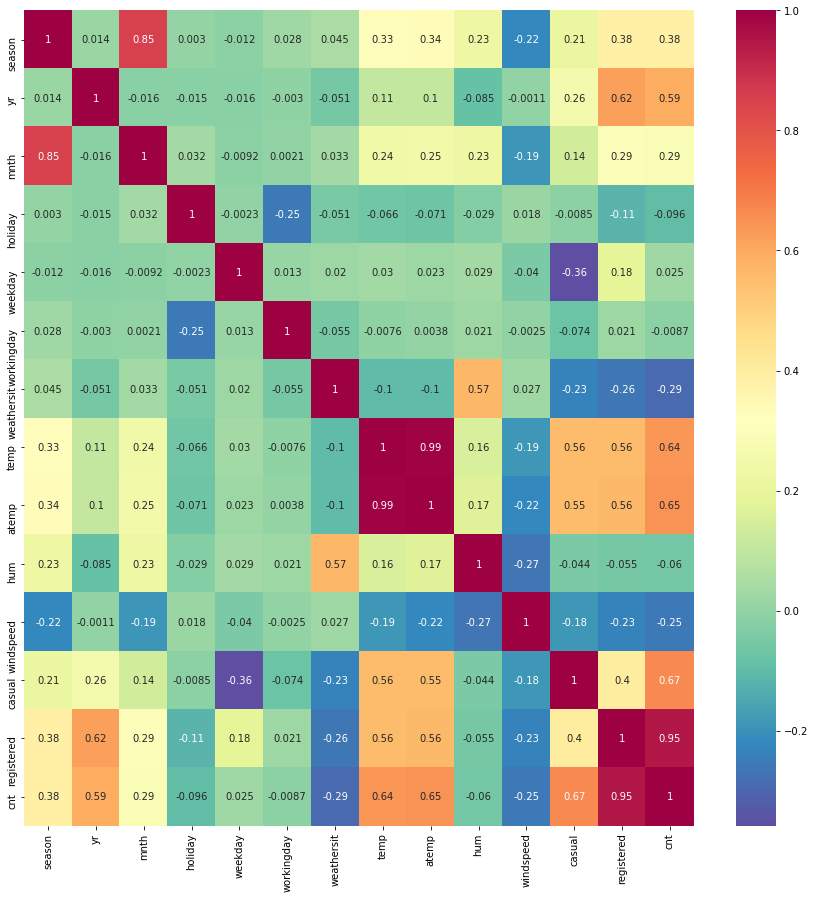

In [26]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

- We cant consider **casual** and **registered** column as they directly add up to **cnt**. 


#### Lets consider other correlations.
Lets consider **atemp**, **temp** and **yr**

### Divide model into x and y sets

In [27]:
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['atemp','yr','temp']].copy()

### Build model and check stats


In [28]:
# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_2 = sm.OLS(y_train,x_train).fit() 

linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.62e-130
Time:                        22:34:55   Log-Likelihood:                -420.20
No. Observations:                 510   AIC:                             848.4
Df Residuals:                     506   BIC:                             865.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5379      0.035    -15.345      0.000      -0.607      -0.469
atemp          0.5154      0.170      3.032      0.003       0.181       0.849
yr             1.0593      0.049     21.471      0.000       0.962       1.156
temp           0.0767      0.170      0.451      0.652      -0.257       0.411
==============================================================================
Omnibus:                       37.600   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.841
Skew:                          -0.544   Prob(JB):                     7.49e-13
Kurtosis:                       4.201   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This looks good but p value of **temp** is very high deeimg it insignificant, which seems right as **temp** and **atemp** would be related as both are  ultimately temperature values

#### Lets keep adding features

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     452.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          8.85e-143
Time:                        22:34:56   Log-Likelihood:                -391.23
No. Observations:                 510   AIC:                             790.5
Df Residuals:                     506   BIC:                             807.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5415      0.033    -16.347      0.000      -0.607      -0.476
season         0.2070      0.025      8.436      0.000       0.159       0.255
yr             1.0662      0.047     22.871      0.000       0.975       1.158
temp           0.5184      0.025     21.010      0.000       0.470       0.567
==============================================================================
Omnibus:                       91.520   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.396
Skew:                          -0.914   Prob(JB):                     1.88e-49
Kurtosis:                       5.687   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

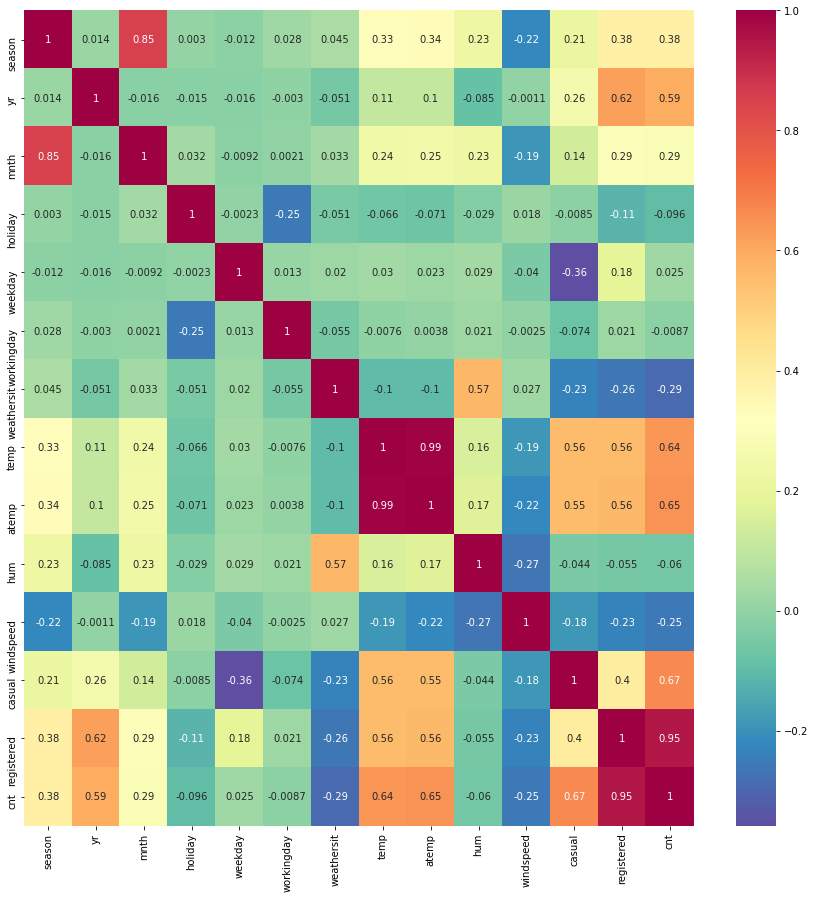

In [29]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp']].copy()  #removing temp and adding season 

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_3 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_3.summary()

This looks good with all variables seeming to be significant and a **good R square** and **adjusted R square** value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     338.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.81e-141
Time:                        22:34:57   Log-Likelihood:                -391.11
No. Observations:                 510   AIC:                             792.2
Df Residuals:                     505   BIC:                             813.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5409      0.033    -16.310      0.000      -0.606      -0.476
season         0.2260      0.046      4.945      0.000       0.136       0.316
yr             1.0651      0.047     22.808      0.000       0.973       1.157
temp           0.5174      0.025     20.897      0.000       0.469       0.566
mnth          -0.0220      0.044     -0.494      0.621      -0.109       0.065
==============================================================================
Omnibus:                       91.640   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.645
Skew:                          -0.914   Prob(JB):                     1.00e-49
Kurtosis:                       5.698   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

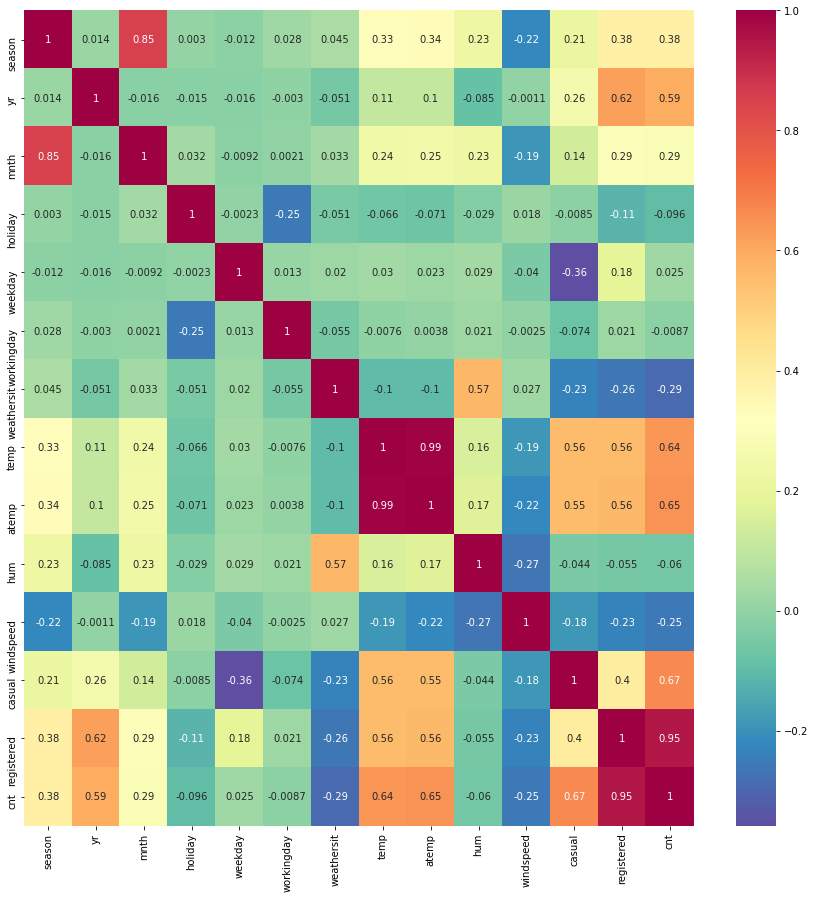

In [30]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','mnth']].copy()  #adding month

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_4 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_4.summary()

Not much difference in R Square and Adjusted R square and the **coefficient** also seems to be **negative** for **mnth** and p value is also very high.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     339.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.39e-141
Time:                        22:34:58   Log-Likelihood:                -390.84
No. Observations:                 510   AIC:                             791.7
Df Residuals:                     505   BIC:                             812.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5419      0.033    -16.354      0.000      -0.607      -0.477
season         0.2075      0.025      8.453      0.000       0.159       0.256
yr             1.0670      0.047     22.879      0.000       0.975       1.159
temp           0.5175      0.025     20.957      0.000       0.469       0.566
weekday        0.0204      0.023      0.880      0.379      -0.025       0.066
==============================================================================
Omnibus:                       89.603   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.283
Skew:                          -0.896   Prob(JB):                     2.42e-48
Kurtosis:                       5.666   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

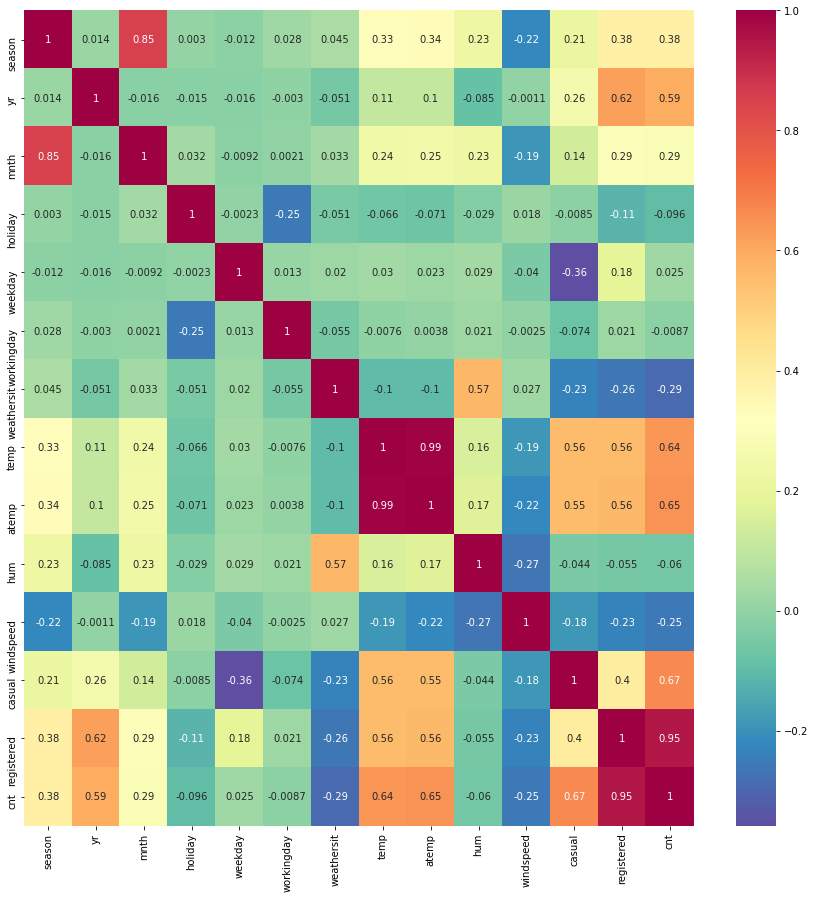

In [31]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','weekday']].copy()  #adding weekday and dropping mnth

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_5 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_5.summary()

**Weekday** has **very high p value** so we need to keep going further, adding and deleting features

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     338.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.90e-141
Time:                        22:34:59   Log-Likelihood:                -391.16
No. Observations:                 510   AIC:                             792.3
Df Residuals:                     505   BIC:                             813.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5275      0.049    -10.699      0.000      -0.624      -0.431
season         0.2073      0.025      8.437      0.000       0.159       0.256
yr             1.0662      0.047     22.851      0.000       0.974       1.158
temp           0.5182      0.025     20.982      0.000       0.470       0.567
workingday    -0.0196      0.051     -0.383      0.702      -0.120       0.081
==============================================================================
Omnibus:                       91.747   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.177
Skew:                          -0.921   Prob(JB):                     5.69e-49
Kurtosis:                       5.658   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

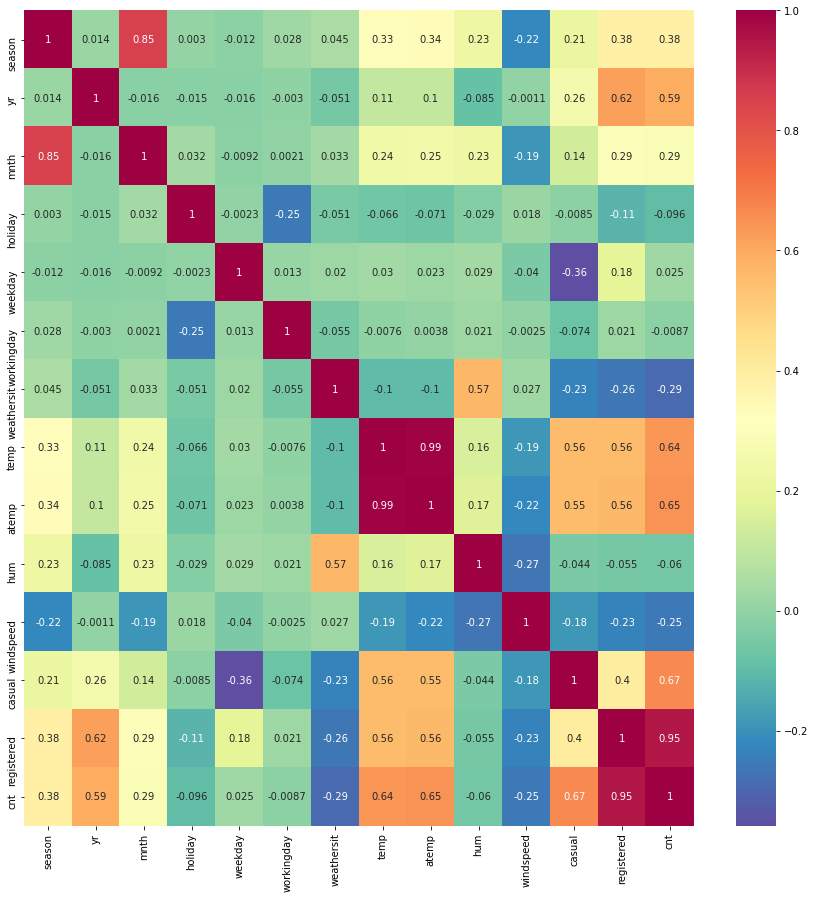

In [32]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','workingday']].copy()  #dropping weekday and adding workingday

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_6 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_6.summary()

**workingday** also has **very high p value** so we drop it and move on

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     379.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.45e-150
Time:                        22:35:01   Log-Likelihood:                -369.92
No. Observations:                 510   AIC:                             749.8
Df Residuals:                     505   BIC:                             771.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5262      0.032    -16.503      0.000      -0.589      -0.464
season         0.2368      0.024      9.876      0.000       0.190       0.284
yr             1.0361      0.045     23.032      0.000       0.948       1.124
temp           0.5339      0.024     22.432      0.000       0.487       0.581
hum           -0.1529      0.023     -6.634      0.000      -0.198      -0.108
==============================================================================
Omnibus:                       79.649   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.592
Skew:                          -0.817   Prob(JB):                     3.03e-41
Kurtosis:                       5.472   Cond. No.                         2.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

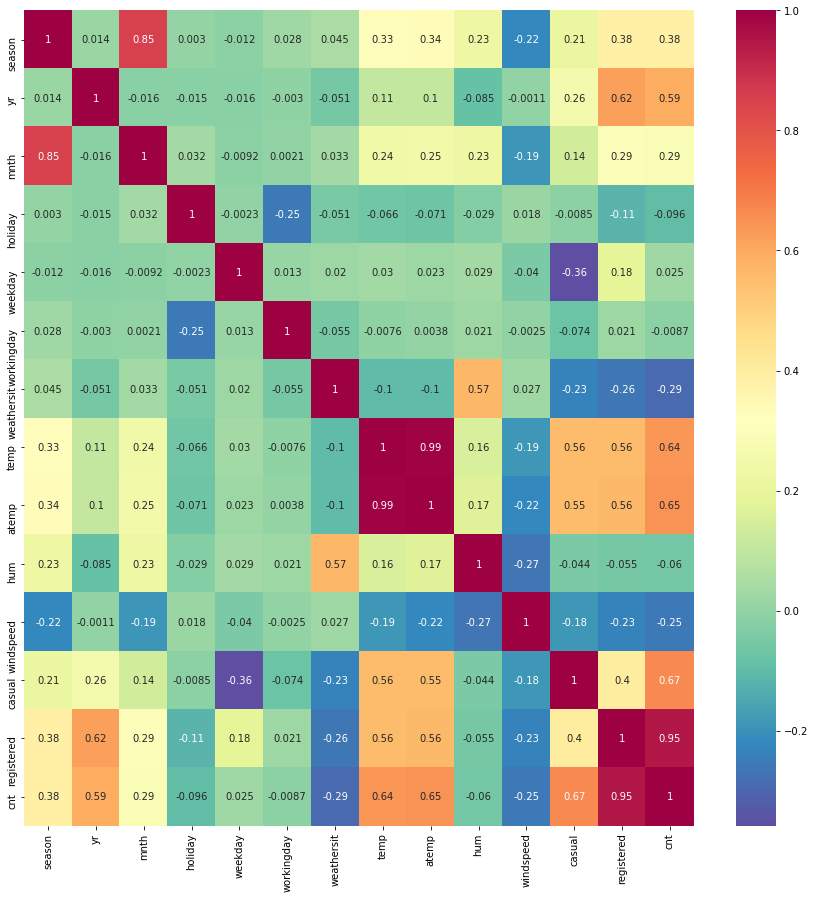

In [33]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','hum']].copy()  #dropping workingday and adding hum

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_7 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_7.summary()

Although **coefficient** for **hum** is **negative**, it is significant feature (**p value is 0**) and also **R square and adjusted R square values have increased** so we keep it

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     308.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          9.76e-151
Time:                        22:35:02   Log-Likelihood:                -366.45
No. Observations:                 510   AIC:                             744.9
Df Residuals:                     504   BIC:                             770.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5161      0.032    -16.167      0.000      -0.579      -0.453
season         0.2387      0.024     10.009      0.000       0.192       0.286
yr             1.0349      0.045     23.140      0.000       0.947       1.123
temp           0.5297      0.024     22.335      0.000       0.483       0.576
hum           -0.1544      0.023     -6.737      0.000      -0.199      -0.109
holiday       -0.3700      0.141     -2.630      0.009      -0.646      -0.094
==============================================================================
Omnibus:                       81.121   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.509
Skew:                          -0.821   Prob(JB):                     3.51e-43
Kurtosis:                       5.550   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

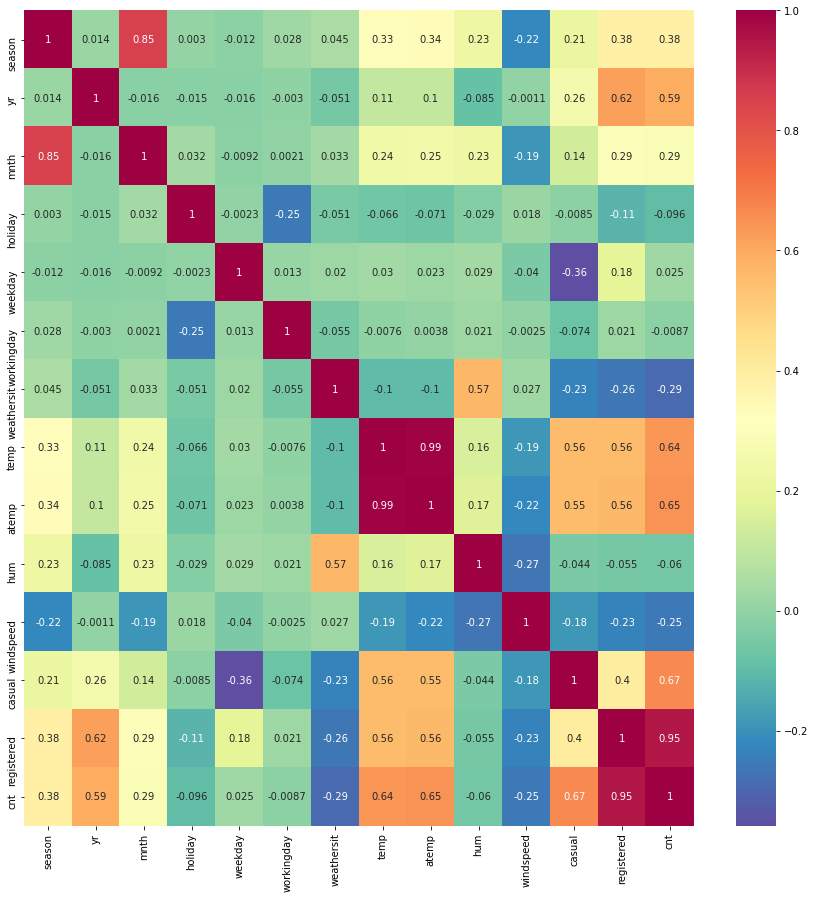

In [34]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','hum','holiday']].copy()  #adding holiday

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_8 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_8.summary()

So far so good but **p value** of **holiday** is **high** but lets keep going

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     290.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          5.48e-160
Time:                        22:35:03   Log-Likelihood:                -341.84
No. Observations:                 510   AIC:                             697.7
Df Residuals:                     503   BIC:                             727.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5152      0.030    -16.920      0.000      -0.575      -0.455
season         0.2177      0.023      9.493      0.000       0.173       0.263
yr             1.0329      0.043     24.213      0.000       0.949       1.117
temp           0.5124      0.023     22.518      0.000       0.468       0.557
hum           -0.1895      0.022     -8.459      0.000      -0.234      -0.146
holiday       -0.3657      0.134     -2.725      0.007      -0.629      -0.102
windspeed     -0.1594      0.022     -7.140      0.000      -0.203      -0.116
==============================================================================
Omnibus:                       61.842   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.791
Skew:                          -0.689   Prob(JB):                     2.94e-28
Kurtosis:                       5.016   Cond. No.                         8.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

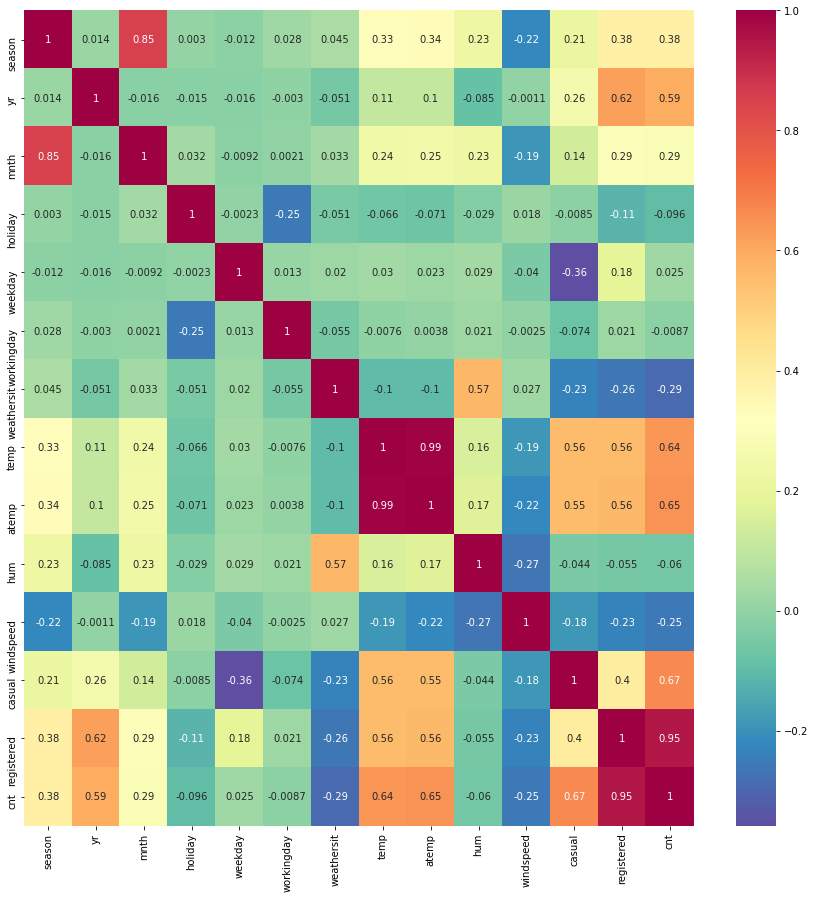

In [35]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','hum','holiday','windspeed']].copy()  #adding windspeed

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_9 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_9.summary()

**p value* of **holiday** is **reduced** and **windspeed** seems to also be **significant**. Lets keep going

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          8.90e-170
Time:                        22:35:04   Log-Likelihood:                -315.94
No. Observations:                 510   AIC:                             647.9
Df Residuals:                     502   BIC:                             681.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5180      0.029    -17.876      0.000      -0.575      -0.461
season         0.2161      0.022      9.900      0.000       0.173       0.259
yr             1.0410      0.041     25.638      0.000       0.961       1.121
temp           0.4801      0.022     21.731      0.000       0.437       0.523
hum           -0.0689      0.027     -2.557      0.011      -0.122      -0.016
holiday       -0.4204      0.128     -3.287      0.001      -0.672      -0.169
windspeed     -0.1283      0.022     -5.924      0.000      -0.171      -0.086
weathersit    -0.1879      0.026     -7.325      0.000      -0.238      -0.137
==============================================================================
Omnibus:                       53.452   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.539
Skew:                          -0.573   Prob(JB):                     6.69e-27
Kurtosis:                       5.088   Cond. No.                         8.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

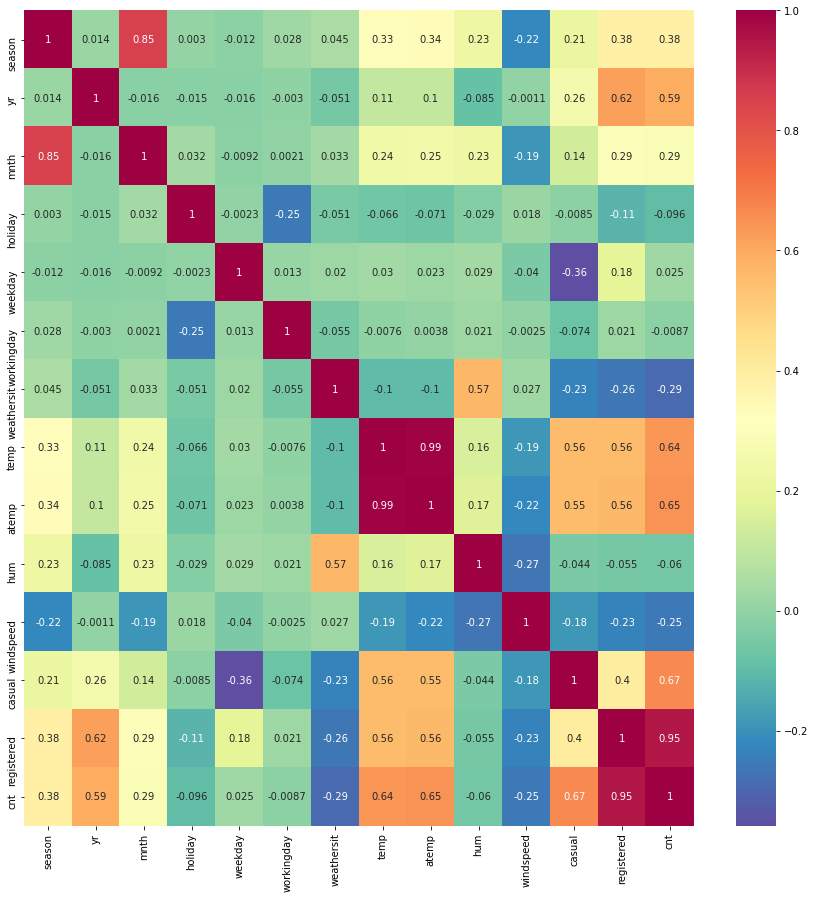

In [36]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','hum','holiday','windspeed','weathersit']].copy()  #adding weathersit

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_10 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_10.summary()

Going good. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          9.22e-167
Time:                        22:35:05   Log-Likelihood:                -311.73
No. Observations:                 510   AIC:                             647.5
Df Residuals:                     498   BIC:                             698.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4510      0.044    -10.171      0.000      -0.538      -0.364
season         0.2354      0.040      5.932      0.000       0.157       0.313
yr             1.0413      0.040     25.734      0.000       0.962       1.121
temp           0.2221      0.142      1.567      0.118      -0.056       0.501
hum           -0.0676      0.027     -2.493      0.013      -0.121      -0.014
holiday       -0.4777      0.132     -3.616      0.000      -0.737      -0.218
windspeed     -0.1194      0.022     -5.445      0.000      -0.162      -0.076
weathersit    -0.1917      0.026     -7.423      0.000      -0.242      -0.141
mnth          -0.0218      0.039     -0.565      0.573      -0.098       0.054
workingday    -0.0922      0.046     -2.001      0.046      -0.183      -0.002
weekday        0.0245      0.020      1.223      0.222      -0.015       0.064
atemp          0.2590      0.143      1.811      0.071      -0.022       0.540
==============================================================================
Omnibus:                       61.619   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.341
Skew:                          -0.664   Prob(JB):                     4.08e-30
Kurtosis:                       5.146   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

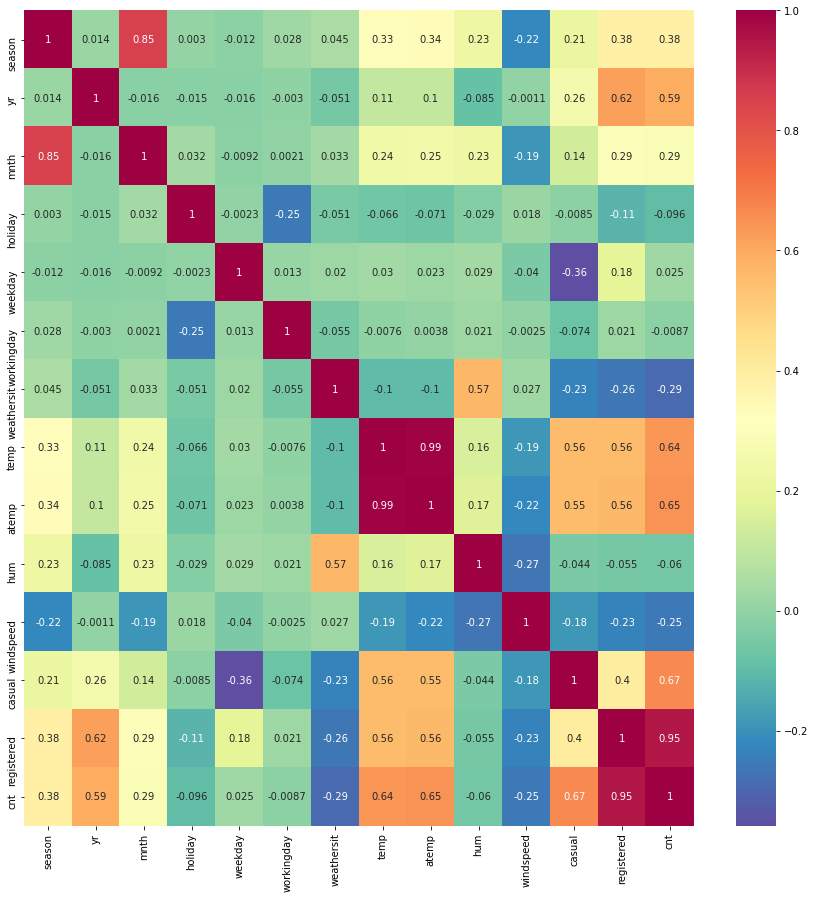

In [37]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','hum','holiday','windspeed','weathersit','mnth','workingday','weekday','atemp']].copy()  #adding mnth, workingday,weekday and atemp

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_11 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_11.summary()

This is better than the previous model but some features have high p values so we drop them one by one.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     200.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          7.43e-168
Time:                        22:35:06   Log-Likelihood:                -311.89
No. Observations:                 510   AIC:                             645.8
Df Residuals:                     499   BIC:                             692.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4521      0.044    -10.212      0.000      -0.539      -0.365
season         0.2167      0.022      9.957      0.000       0.174       0.259
yr             1.0421      0.040     25.787      0.000       0.963       1.121
temp           0.2229      0.142      1.573      0.116      -0.055       0.501
hum           -0.0692      0.027     -2.568      0.011      -0.122      -0.016
holiday       -0.4803      0.132     -3.641      0.000      -0.740      -0.221
windspeed     -0.1195      0.022     -5.457      0.000      -0.163      -0.076
weathersit    -0.1905      0.026     -7.407      0.000      -0.241      -0.140
workingday    -0.0911      0.046     -1.981      0.048      -0.181      -0.001
weekday        0.0245      0.020      1.222      0.222      -0.015       0.064
atemp          0.2595      0.143      1.816      0.070      -0.021       0.540
==============================================================================
Omnibus:                       61.122   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.939
Skew:                          -0.660   Prob(JB):                     8.23e-30
Kurtosis:                       5.136   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

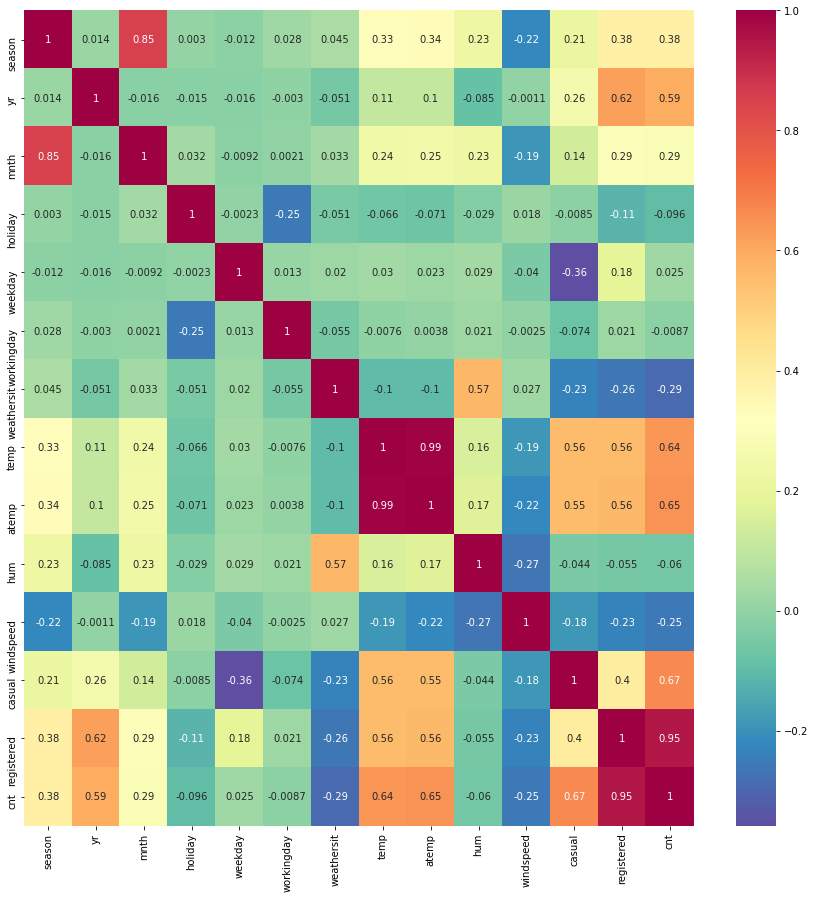

In [38]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','hum','holiday','windspeed','weathersit','workingday','weekday','atemp']].copy()  #dropping mnth

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_12 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     222.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.02e-168
Time:                        22:35:07   Log-Likelihood:                -312.65
No. Observations:                 510   AIC:                             645.3
Df Residuals:                     500   BIC:                             687.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4525      0.044    -10.215      0.000      -0.539      -0.365
season         0.2159      0.022      9.920      0.000       0.173       0.259
yr             1.0412      0.040     25.757      0.000       0.962       1.121
temp           0.2328      0.141      1.646      0.100      -0.045       0.511
hum           -0.0690      0.027     -2.556      0.011      -0.122      -0.016
holiday       -0.4795      0.132     -3.633      0.000      -0.739      -0.220
windspeed     -0.1208      0.022     -5.516      0.000      -0.164      -0.078
weathersit    -0.1900      0.026     -7.386      0.000      -0.241      -0.139
workingday    -0.0900      0.046     -1.957      0.051      -0.180       0.000
atemp          0.2502      0.143      1.752      0.080      -0.030       0.531
==============================================================================
Omnibus:                       64.389   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.232
Skew:                          -0.692   Prob(JB):                     2.15e-31
Kurtosis:                       5.175   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

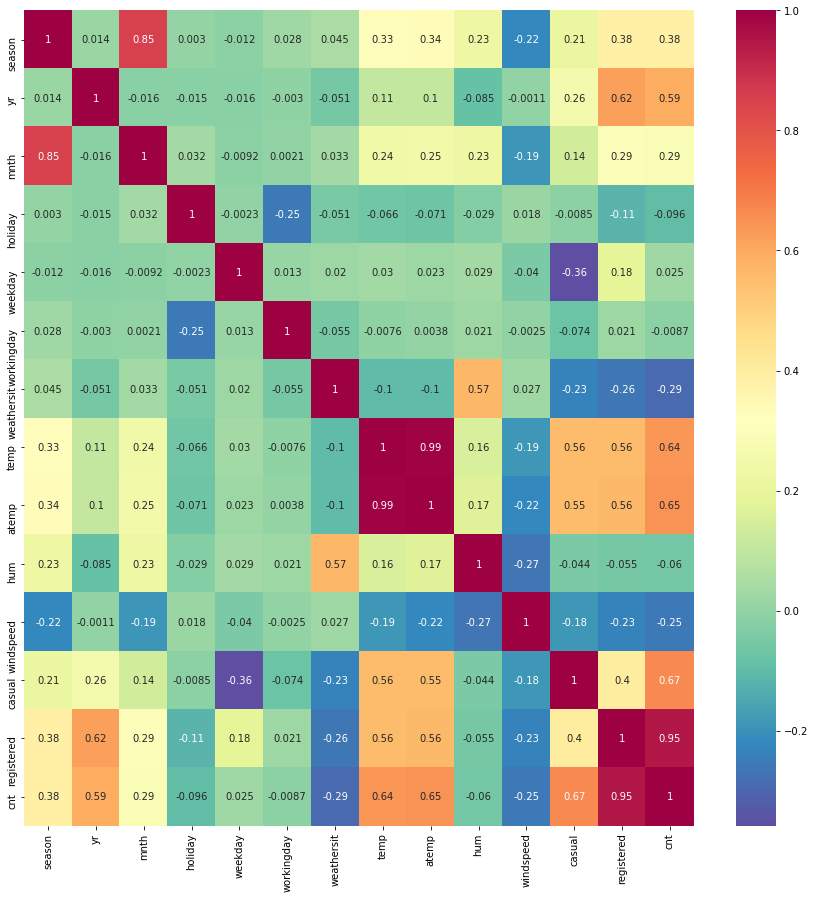

In [39]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','temp','hum','holiday','windspeed','weathersit','workingday','atemp']].copy()  #dropping weekday

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_13 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.39e-169
Time:                        22:35:08   Log-Likelihood:                -314.03
No. Observations:                 510   AIC:                             646.1
Df Residuals:                     501   BIC:                             684.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4493      0.044    -10.136      0.000      -0.536      -0.362
season         0.2159      0.022      9.904      0.000       0.173       0.259
yr             1.0425      0.040     25.752      0.000       0.963       1.122
hum           -0.0712      0.027     -2.639      0.009      -0.124      -0.018
holiday       -0.4780      0.132     -3.615      0.000      -0.738      -0.218
windspeed     -0.1151      0.022     -5.313      0.000      -0.158      -0.073
weathersit    -0.1887      0.026     -7.325      0.000      -0.239      -0.138
workingday    -0.0955      0.046     -2.077      0.038      -0.186      -0.005
atemp          0.4823      0.022     21.658      0.000       0.439       0.526
==============================================================================
Omnibus:                       66.659   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.037
Skew:                          -0.696   Prob(JB):                     3.56e-34
Kurtosis:                       5.304   Cond. No.                         9.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

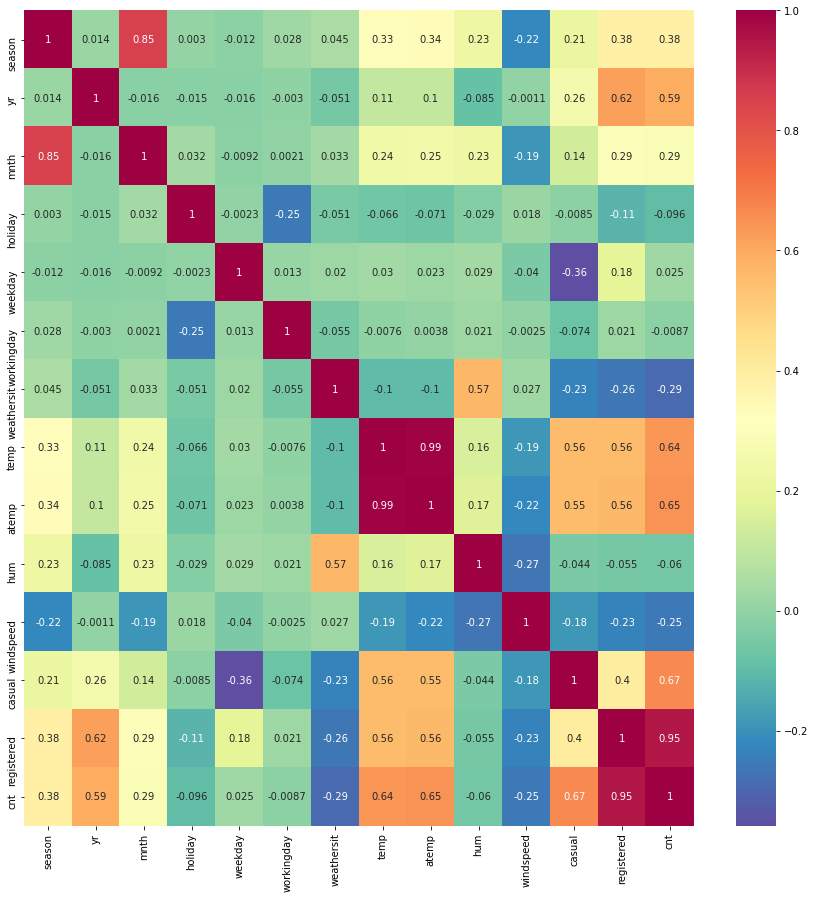

In [40]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','hum','holiday','windspeed','weathersit','workingday','atemp']].copy()  #dropping temp

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_14 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     282.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.17e-169
Time:                        22:35:09   Log-Likelihood:                -316.22
No. Observations:                 510   AIC:                             648.4
Df Residuals:                     502   BIC:                             682.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5191      0.029    -17.909      0.000      -0.576      -0.462
season         0.2144      0.022      9.807      0.000       0.171       0.257
yr             1.0426      0.041     25.669      0.000       0.963       1.122
hum           -0.0753      0.027     -2.788      0.006      -0.128      -0.022
holiday       -0.4061      0.128     -3.172      0.002      -0.658      -0.155
windspeed     -0.1163      0.022     -5.353      0.000      -0.159      -0.074
weathersit    -0.1832      0.026     -7.124      0.000      -0.234      -0.133
atemp          0.4845      0.022     21.707      0.000       0.441       0.528
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.832
Skew:                          -0.622   Prob(JB):                     1.77e-33
Kurtosis:                       5.356   Cond. No.                         8.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

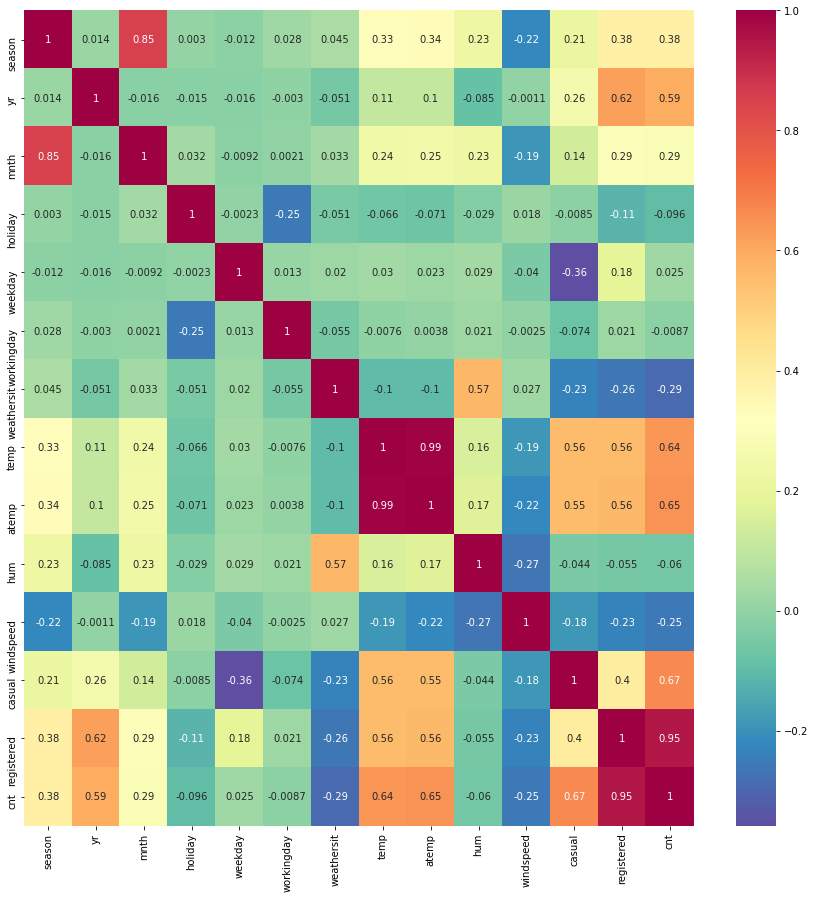

In [41]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','hum','holiday','windspeed','weathersit','atemp']].copy()  #dropping workingday

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_15 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     324.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.91e-169
Time:                        22:35:10   Log-Likelihood:                -320.14
No. Observations:                 510   AIC:                             654.3
Df Residuals:                     503   BIC:                             683.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5245      0.029    -18.014      0.000      -0.582      -0.467
season         0.2068      0.022      9.471      0.000       0.164       0.250
yr             1.0536      0.041     25.886      0.000       0.974       1.134
holiday       -0.4127      0.129     -3.203      0.001      -0.666      -0.160
windspeed     -0.0991      0.021     -4.726      0.000      -0.140      -0.058
weathersit    -0.2271      0.020    -11.105      0.000      -0.267      -0.187
atemp          0.4728      0.022     21.422      0.000       0.429       0.516
==============================================================================
Omnibus:                       59.700   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.359
Skew:                          -0.618   Prob(JB):                     1.22e-31
Kurtosis:                       5.275   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

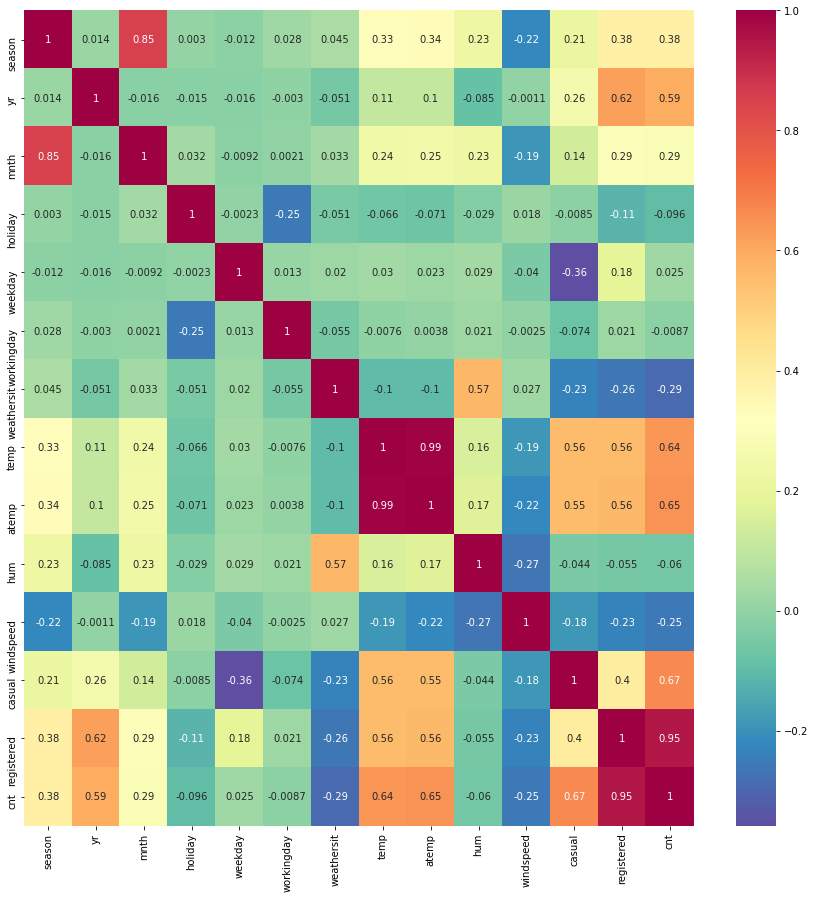

In [42]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','holiday','windspeed','weathersit','atemp']].copy()  #dropping hum

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_16 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     380.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.25e-168
Time:                        22:35:11   Log-Likelihood:                -325.29
No. Observations:                 510   AIC:                             662.6
Df Residuals:                     504   BIC:                             688.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5357      0.029    -18.363      0.000      -0.593      -0.478
season         0.2044      0.022      9.281      0.000       0.161       0.248
yr             1.0548      0.041     25.683      0.000       0.974       1.135
windspeed     -0.0997      0.021     -4.710      0.000      -0.141      -0.058
weathersit    -0.2231      0.021    -10.830      0.000      -0.264      -0.183
atemp          0.4784      0.022     21.550      0.000       0.435       0.522
==============================================================================
Omnibus:                       65.625   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.717
Skew:                          -0.663   Prob(JB):                     4.64e-36
Kurtosis:                       5.429   Cond. No.                         2.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

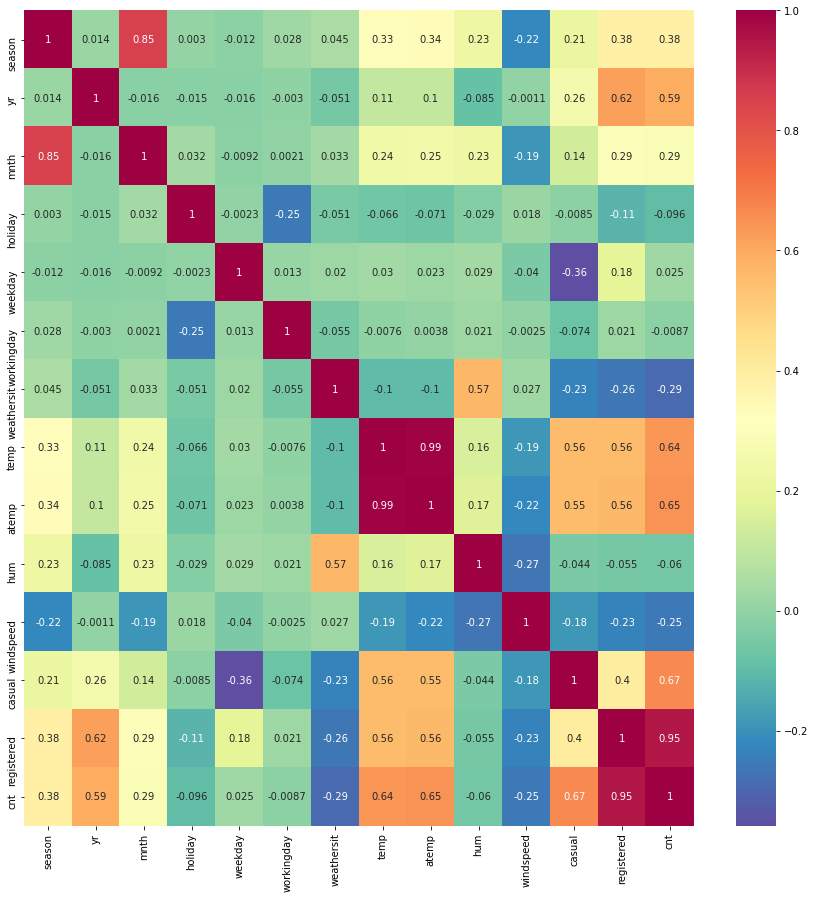

In [43]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','windspeed','weathersit','atemp']].copy()  #dropping holiday

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_17 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_17.summary()

Now we need to decide which model to choose among model 17, 16, 15 and 14.

We are choosing **model 14** for having the **best accuracy** and **all p values in an acceptable range**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.5
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.39e-169
Time:                        22:35:12   Log-Likelihood:                -314.03
No. Observations:                 510   AIC:                             646.1
Df Residuals:                     501   BIC:                             684.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4493      0.044    -10.136      0.000      -0.536      -0.362
season         0.2159      0.022      9.904      0.000       0.173       0.259
yr             1.0425      0.040     25.752      0.000       0.963       1.122
hum           -0.0712      0.027     -2.639      0.009      -0.124      -0.018
holiday       -0.4780      0.132     -3.615      0.000      -0.738      -0.218
windspeed     -0.1151      0.022     -5.313      0.000      -0.158      -0.073
weathersit    -0.1887      0.026     -7.325      0.000      -0.239      -0.138
workingday    -0.0955      0.046     -2.077      0.038      -0.186      -0.005
atemp          0.4823      0.022     21.658      0.000       0.439       0.526
==============================================================================
Omnibus:                       66.659   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.037
Skew:                          -0.696   Prob(JB):                     3.56e-34
Kurtosis:                       5.304   Cond. No.                         9.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

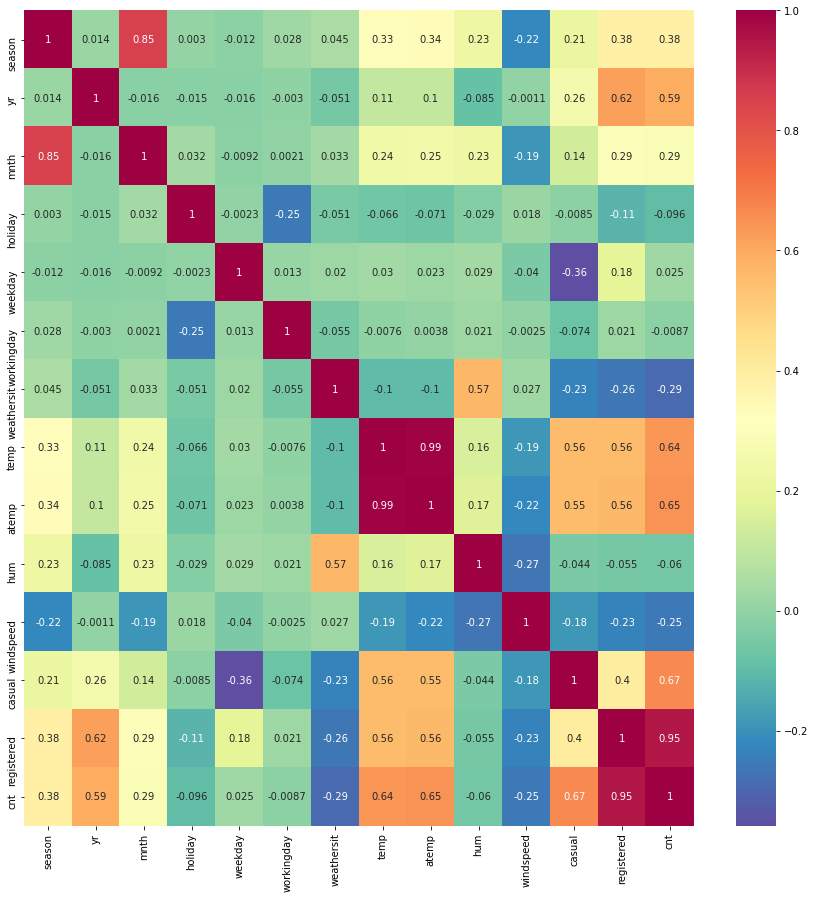

In [44]:
#Read the data
bikes = pd.read_csv("day.csv")

#dropping instant and dteday column
bikes = bikes.drop(["instant"],axis=1)
bikes = bikes.drop(["dteday"],axis=1)

#train test split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


#Apply scaler to below columns
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

bikes_train[numeric_varriables] = std_scaler.fit_transform(bikes_train[numeric_varriables])

# Checking correlation between all the features
plt.figure(figsize=(15,15))
sns.heatmap(bikes_train.corr(),cmap='Spectral_r',annot=True)

#Divide the model into x and y sets
y_train = bikes_train.pop('cnt')
x_train = bikes_train[['season','yr','hum','holiday','windspeed','weathersit','workingday','atemp']].copy()

# Adding a constant variable   
x_train = sm.add_constant(x_train)

# Running the linear model
linear_model_14 = sm.OLS(y_train,x_train).fit() 

#Check stats
linear_model_14.summary()

Some of the **features** have **negative coefficients** but hey, it has a **better accuracy** and we are all for accuracy and **good significance**

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [45]:
y_train_predicted =  linear_model_14.predict(x_train)

In [47]:
residual  = y_train - y_train_predicted

Text(0.5, 0, 'Errors')

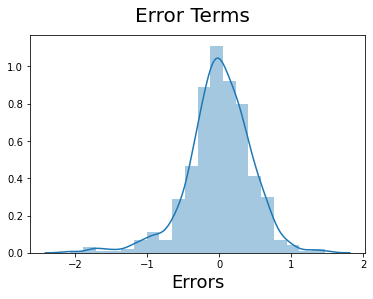

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms histogram seems to be almost a **normal dstribution** with mean centered around 0. We are good to go with this model

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourteenth model.

In [50]:
numeric_varriables = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt','registered','casual']

#Apply scaler to below columns
bikes_test[numeric_varriables] = std_scaler.transform(bikes_test[numeric_varriables])

#Divide the model into x and y sets
y_test = bikes_test.pop('cnt')
x_test = bikes_test[['season','yr','hum','holiday','windspeed','weathersit','workingday','atemp']].copy()

# Adding a constant variable   
x_test = sm.add_constant(x_test)

#predicting 
y_test_predicted = linear_model_14.predict(x_test)

Text(0, 0.5, 'y_pred')

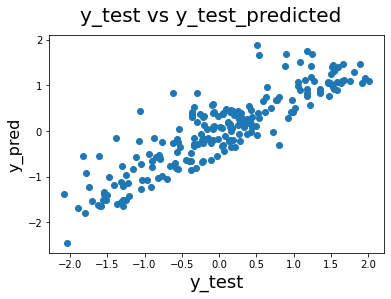

In [51]:
# Plotting y_test and y_test_predicted to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_predicted)
fig.suptitle('y_test vs y_test_predicted', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [53]:
#evaluate
r2_score(y_true=y_test,y_pred=y_test_predicted)

0.7844848239793634

In [57]:
r2_score(y_true=y_train,y_pred=y_train_predicted)

0.7993878607828281

**R2 score of predicted data seems to be pretty close to trained data**

In [58]:
from sklearn.metrics import mean_squared_error
#Returns the mean squared error; we'll take a square root
mean_squared_error(y_test, y_test_predicted)

0.20332683937480048

### Just one last thing i.e. VIF

In [54]:
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.91
3,hum,1.82
6,weathersit,1.66
8,atemp,1.24
1,season,1.19
5,windspeed,1.17
4,holiday,1.08
7,workingday,1.08
2,yr,1.02


**VIF also seems to be good**

So, the equation of our best fitted line is

### Equation
**cnt** = (**0.2519** * season) + (**1.0425** * yr) - (**0.0712** * hum) - (**0.4780** * holiday) - (**0.1151** * windspeed) - (**0.1887** * weathersit) -  (**0.0955** * workingday) + (**0.4823** * atemp) - **0.4493** 